In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [125]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## EDA

In [126]:
train_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [127]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [128]:
train_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [129]:
# we will drop the columns that are not useful I think ["fnlwgt", "educational-num", "marital-status",  "relationship"]
train_data[train_data["income_>50K"] == 1] 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1
17,54,Federal-gov,278076,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
19,44,Private,136986,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43942,39,Private,33355,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,7298,0,48,United-States,1
43943,53,Private,153064,5th-6th,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,10,Yugoslavia,1
43946,47,Private,420986,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
43948,44,Private,247880,Assoc-voc,11,Divorced,Exec-managerial,Not-in-family,White,Male,8614,0,40,United-States,1


In [130]:
# we will make a copy of train_data and we will proceed with that copy
X = train_data.copy()

### Drop not useful features

In [131]:
drop_cols = ["fnlwgt", "educational-num", "marital-status",  "relationship"]
def drop_features(df):
    
    try:
        df.drop(drop_cols, axis=1, inplace=True)
    except Exception as e:
        e
        
    return df

In [132]:
X = drop_features(X)

In [133]:
X

,age,workclass,education,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,Doctorate,Exec-managerial,White,Male,99999,0,60,United-States,1
1,17,Private,12th,Other-service,White,Male,0,0,15,United-States,0
2,31,Private,Bachelors,Exec-managerial,White,Male,0,0,40,United-States,1
3,58,State-gov,7th-8th,Transport-moving,White,Male,0,0,40,United-States,0
4,25,State-gov,Some-college,Other-service,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,Bachelors,Exec-managerial,White,Male,0,0,50,United-States,1
43953,19,Private,HS-grad,Other-service,White,Female,0,0,40,United-States,0
43954,30,Private,Some-college,Sales,White,Male,0,0,58,United-States,0
43955,46,Private,Bachelors,Sales,White,Female,0,0,35,United-States,0


### Detecting outliers

In [134]:
X["capital-gain"].value_counts()

0        40330
15024      448
7688       370
7298       328
99999      228
         ...  
6612         1
1639         1
7262         1
1111         1
1731         1
Name: capital-gain, Length: 122, dtype: int64

In [135]:
X["capital-gain"].mean()

1093.5597970744136

{'whiskers': [<matplotlib.lines.Line2D at 0x259881fca00>,
 'caps': [<matplotlib.lines.Line2D at 0x259881fcfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x259881fc730>],
 'medians': [<matplotlib.lines.Line2D at 0x2598825b580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2598825b850>],
 'means': []}

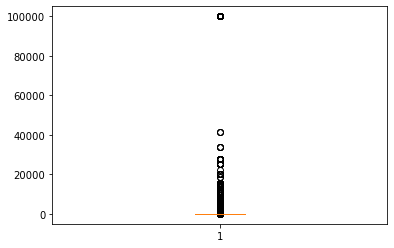

In [136]:
# To find outliers
plt.boxplot(X["capital-gain"])

In [137]:
X[(X["capital-gain"] == 99999)]

,age,workclass,education,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,Doctorate,Exec-managerial,White,Male,99999,0,60,United-States,1
76,47,Private,Prof-school,Exec-managerial,White,Male,99999,0,40,United-States,1
103,49,Self-emp-inc,Bachelors,Sales,White,Male,99999,0,40,United-States,1
739,46,Private,Bachelors,Sales,White,Male,99999,0,40,United-States,1
917,47,Private,Some-college,Sales,White,Male,99999,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...
42809,32,Private,Prof-school,Prof-specialty,White,Female,99999,0,60,United-States,1
42869,47,Private,Masters,Exec-managerial,White,Male,99999,0,50,United-States,1
43226,44,Self-emp-inc,Bachelors,Exec-managerial,White,Male,99999,0,45,United-States,1
43789,26,Private,Prof-school,Prof-specialty,White,Male,99999,0,60,United-States,1


In [138]:
 X[(X["capital-gain"] >= 99999) & (X["income_>50K"] == 1)]

,age,workclass,education,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,Doctorate,Exec-managerial,White,Male,99999,0,60,United-States,1
76,47,Private,Prof-school,Exec-managerial,White,Male,99999,0,40,United-States,1
103,49,Self-emp-inc,Bachelors,Sales,White,Male,99999,0,40,United-States,1
739,46,Private,Bachelors,Sales,White,Male,99999,0,40,United-States,1
917,47,Private,Some-college,Sales,White,Male,99999,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...
42809,32,Private,Prof-school,Prof-specialty,White,Female,99999,0,60,United-States,1
42869,47,Private,Masters,Exec-managerial,White,Male,99999,0,50,United-States,1
43226,44,Self-emp-inc,Bachelors,Exec-managerial,White,Male,99999,0,45,United-States,1
43789,26,Private,Prof-school,Prof-specialty,White,Male,99999,0,60,United-States,1


In [139]:
# since 99999 is too much away from the data we will replace it with next value which is 15024
def outlier(df):
    df["capital-gain"] = df["capital-gain"].replace({99999:15024})
    return df

In [140]:
X = outlier(X)

In [141]:
# By removing 1 outlier alone reduces the mean
X["capital-gain"].mean()

652.8040585117274

## Splitting the Dataset

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
# seperate dependent feature and independent features
y = X.pop("income_>50K")

In [144]:
# split the dataset into train dataset and test dataset in 80:20 ratio, randomly
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [145]:
train_X

,age,workclass,education,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
29885,57,Private,Bachelors,Prof-specialty,White,Male,10520,0,40,United-States
17710,28,Private,Some-college,Transport-moving,White,Male,0,0,40,El-Salvador
13638,45,Local-gov,Bachelors,Prof-specialty,White,Female,0,0,40,United-States
21513,48,Private,Some-college,Exec-managerial,White,Male,0,0,65,United-States
8429,19,NaN,Some-college,NaN,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...
30403,43,Self-emp-not-inc,Doctorate,Prof-specialty,White,Male,0,0,42,United-States
21243,52,Private,10th,Machine-op-inspct,Black,Female,0,0,40,United-States
42613,50,State-gov,HS-grad,Adm-clerical,White,Female,0,0,40,United-States
43567,39,Private,Some-college,Adm-clerical,Black,Female,0,0,50,United-States


In [146]:
valid_X

,age,workclass,education,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
26618,56,Local-gov,Masters,Prof-specialty,White,Male,0,0,40,United-States
22810,34,Private,Some-college,Sales,White,Male,0,0,55,United-States
3030,52,Private,Masters,Prof-specialty,White,Female,0,0,40,United-States
39290,20,Private,Some-college,Adm-clerical,Black,Male,0,0,40,United-States
10702,17,Local-gov,11th,Craft-repair,White,Male,0,0,35,United-States
...,...,...,...,...,...,...,...,...,...,...
21726,30,Private,Doctorate,Prof-specialty,Asian-Pac-Islander,Male,0,1977,40,China
22711,35,NaN,9th,NaN,Amer-Indian-Eskimo,Male,0,0,38,United-States
4669,30,Private,Assoc-voc,Prof-specialty,White,Female,0,0,40,United-States
41576,27,State-gov,Bachelors,Prof-specialty,White,Female,4101,0,40,United-States


## Encoding and Dealing with missing values

In [147]:
# Differentiate numerical features and Categorical features
obj_cols = [col for col in X.select_dtypes("object")]
num_cols = list(set(X.columns) - set(obj_cols))

In [148]:
X[obj_cols]

,workclass,education,occupation,race,gender,native-country
0,Private,Doctorate,Exec-managerial,White,Male,United-States
1,Private,12th,Other-service,White,Male,United-States
2,Private,Bachelors,Exec-managerial,White,Male,United-States
3,State-gov,7th-8th,Transport-moving,White,Male,United-States
4,State-gov,Some-college,Other-service,Black,Male,United-States
...,...,...,...,...,...,...
43952,Private,Bachelors,Exec-managerial,White,Male,United-States
43953,Private,HS-grad,Other-service,White,Female,United-States
43954,Private,Some-college,Sales,White,Male,United-States
43955,Private,Bachelors,Sales,White,Female,United-States


In [149]:
# unordered categorical features are called nominal features 
features_nom = ["race", "gender", "native-country", "occupation"]

In [150]:
# ordered categorical features are called ordinal features
features_ord = ["workclass", "education"]

In [151]:
X["workclass"].value_counts()

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

In [152]:
#Pandas calls the ordinal categories as levels
work_class_levels = [
    "Federal-gov", 
    "State-gov", 
    "Local-gov", 
    "Private", 
    "Self-emp-inc", 
    "Self-emp-not-inc", 
    "Without-pay", 
    "Never-worked",
]

In [153]:
X["education"].value_counts()

HS-grad         14197
Some-college     9790
Bachelors        7219
Masters          2392
Assoc-voc        1831
11th             1647
Assoc-acdm       1447
10th             1250
7th-8th           862
Prof-school       748
9th               684
12th              587
Doctorate         536
5th-6th           468
1st-4th           223
Preschool          76
Name: education, dtype: int64

In [154]:
edu_class_levels = [
    "Doctorate", 
    "Masters", 
    "Bachelors", 
    "Assoc-voc", 
    "Assoc-acdm", 
    "HS-grad", 
    "Some-college", 
    "12th", 
    "11th",
    "Prof-school",
    "10th",
    "9th",
    "7th-8th",
    "5th-6th",
    "1st-4th",
    "Preschool",

]

In [155]:
ordered_levels = {
    "workclass" : work_class_levels,
    "education" : edu_class_levels,
}

In [156]:
# add None level for missing values
ordered_levels = {key : ["None"] + value for key, value in ordered_levels.items()}

In [157]:
ordered_levels

{'workclass': ['None',
  'Federal-gov',
  'State-gov',
  'Local-gov',
  'Private',
  'Self-emp-inc',
  'Self-emp-not-inc',
  'Without-pay',
  'Never-worked'],
 'education': ['None',
  'Doctorate',
  'Masters',
  'Bachelors',
  'Assoc-voc',
  'Assoc-acdm',
  'HS-grad',
  'Some-college',
  '12th',
  '11th',
  'Prof-school',
  '10th',
  '9th',
  '7th-8th',
  '5th-6th',
  '1st-4th',
  'Preschool']}

In [158]:
# Encode the statistical Data Type
# Pandas has Python Data types corresponding to the standard statistical types (numerical, categorical, ...)
# Encoding each feature will make it easier for us to apply transformations consistently
# Numeric features are already encoded correctly
def encode(df):
    # nominal categories
    for col in features_nom:
        df[col] = df[col].astype("category")
        #Add a None category for missing values
        if "None" not in df[col].cat.categories:
            df[col].cat.add_categories("None", inplace=True)
            
    #Ordinal categories
    for col, levels in ordered_levels.items():
        df[col] = df[col].astype(CategoricalDtype(levels, ordered=True))
    return df

In [159]:
# Handling missing values, we'll impute 0 for missing numeric values and
#"None" for missing categorical values

def impute(df):
    for col in df.select_dtypes("number"):
        df[col] = df[col].fillna(0)
    for col in df.select_dtypes("category"):
        df[col] = df[col].fillna("None")
        
    return df

In [160]:
def encode_impute(df_train, df_valid):
    #Merge the splits
    df = pd.concat([df_train, df_valid])
    
    #preprocessing
    df = encode(df)
    df = impute(df)
    
    #Reform splits
    df_train = df.loc[df_train.index, :]
    df_valid = df.loc[df_valid.index, :]
    
    return df_train, df_valid

In [161]:
train_X, valid_X = encode_impute(train_X, valid_X)

C:\Users\yaswa\AppData\Local\Temp\ipykernel_660\696609173.py:11: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df[col].cat.add_categories("None", inplace=True)
C:\Users\yaswa\AppData\Local\Temp\ipykernel_660\696609173.py:11: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df[col].cat.add_categories("None", inplace=True)
C:\Users\yaswa\AppData\Local\Temp\ipykernel_660\696609173.py:11: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df[col].cat.add_categories("None", inplace=True)
C:\Users\yaswa\AppData\Local\Temp\ipykernel

In [162]:
train_X

,age,workclass,education,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
29885,57,Private,Bachelors,Prof-specialty,White,Male,10520,0,40,United-States
17710,28,Private,Some-college,Transport-moving,White,Male,0,0,40,El-Salvador
13638,45,Local-gov,Bachelors,Prof-specialty,White,Female,0,0,40,United-States
21513,48,Private,Some-college,Exec-managerial,White,Male,0,0,65,United-States
8429,19,None,Some-college,None,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...
30403,43,Self-emp-not-inc,Doctorate,Prof-specialty,White,Male,0,0,42,United-States
21243,52,Private,10th,Machine-op-inspct,Black,Female,0,0,40,United-States
42613,50,State-gov,HS-grad,Adm-clerical,White,Female,0,0,40,United-States
43567,39,Private,Some-college,Adm-clerical,Black,Female,0,0,50,United-States


In [163]:
train_X.isnull().any()

age               False
workclass         False
education         False
occupation        False
race              False
gender            False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
dtype: bool

In [164]:
valid_X

,age,workclass,education,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
26618,56,Local-gov,Masters,Prof-specialty,White,Male,0,0,40,United-States
22810,34,Private,Some-college,Sales,White,Male,0,0,55,United-States
3030,52,Private,Masters,Prof-specialty,White,Female,0,0,40,United-States
39290,20,Private,Some-college,Adm-clerical,Black,Male,0,0,40,United-States
10702,17,Local-gov,11th,Craft-repair,White,Male,0,0,35,United-States
...,...,...,...,...,...,...,...,...,...,...
21726,30,Private,Doctorate,Prof-specialty,Asian-Pac-Islander,Male,0,1977,40,China
22711,35,None,9th,None,Amer-Indian-Eskimo,Male,0,0,38,United-States
4669,30,Private,Assoc-voc,Prof-specialty,White,Female,0,0,40,United-States
41576,27,State-gov,Bachelors,Prof-specialty,White,Female,4101,0,40,United-States


In [165]:
train_X.isnull().any()

age               False
workclass         False
education         False
occupation        False
race              False
gender            False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
dtype: bool

### Ordinal and OneHot Encoding

In [166]:
# import
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [167]:
# creating the encoder objects
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
oe = OrdinalEncoder(handle_unknown="error")

In [168]:
# we have to fit_transform the train_dataset 
def train_encoder(df):
    # Ordinal Encoding
    df[features_ord] = oe.fit_transform(df[features_ord])
    
    # OneHotEncoding
    enc = pd.DataFrame(ohe.fit_transform(df[features_nom]), columns=ohe.get_feature_names_out())
    enc_X = pd.concat([df.reset_index(), enc], axis=1)
    enc_X.index = df.index
    enc_X.drop(features_nom, axis=1, inplace=True)
    enc_X.drop("index", axis=1, inplace=True)
    
    return enc_X

In [169]:
# we have to transform the test_dataset or validation_dataset 
def test_encoder(df):
    # Ordinal Encoding
    df[features_ord] = oe.transform(df[features_ord])
    
    # OneHotEncoding
    enc = pd.DataFrame(ohe.transform(df[features_nom]), columns=ohe.get_feature_names_out())
    enc_X = pd.concat([df.reset_index(), enc], axis=1)
    enc_X.index = df.index
    enc_X.drop(features_nom, axis=1, inplace=True)
    enc_X.drop("index", axis=1, inplace=True)
    
    return enc_X
    

In [170]:
train_X = train_encoder(train_X)

In [171]:
train_X

,age,workclass,education,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_None,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
29885,57,4.0,9.0,10520,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17710,28,4.0,15.0,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13638,45,1.0,9.0,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21513,48,4.0,15.0,0,0,65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8429,19,3.0,15.0,0,0,30,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,43,6.0,10.0,0,0,42,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21243,52,4.0,0.0,0,0,40,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42613,50,7.0,11.0,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43567,39,4.0,15.0,0,0,50,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
valid_X  = test_encoder(valid_X)

In [173]:
valid_X

,age,workclass,education,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_None,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
26618,56,1.0,12.0,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22810,34,4.0,15.0,0,0,55,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3030,52,4.0,12.0,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39290,20,4.0,15.0,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10702,17,1.0,1.0,0,0,35,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21726,30,4.0,10.0,0,1977,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22711,35,3.0,6.0,0,0,38,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4669,30,4.0,8.0,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41576,27,7.0,9.0,4101,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Model creation - XGBClassifier 

In [174]:
from xgboost import XGBClassifier


In [175]:
xgb_params = {
    'max_depth': 9, 
    'learning_rate': 0.0027660633169063423, 
    'n_estimators': 2965, 
    'min_child_weight': 4, 
    'colsample_bytree': 0.6019996714560173, 
    'subsample': 0.9990819155629611, 
    'reg_alpha': 7.052473239736642, 
    'num_parallel_tree': 1,
}

In [176]:
model = XGBClassifier(**xgb_params)

In [178]:
model.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6019996714560173, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0027660633169063423,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=2965, n_jobs=None, num_parallel_tree=1,
              predictor=None, random_state=None, ...)

In [179]:
predicted_values = model.predict(valid_X)

In [180]:
predicted_values

array([1, 0, 0, ..., 0, 0, 0])

### Metrics

#### Confusion Matrix

In [181]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay

In [182]:
c_matrix = confusion_matrix(valid_y, predicted_values)

In [183]:
print(c_matrix)

[[6395  280]
 [ 970 1147]]


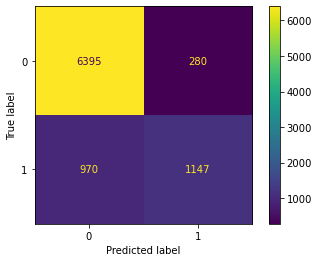

In [184]:
ConfusionMatrixDisplay.from_estimator(model, valid_X, valid_y)

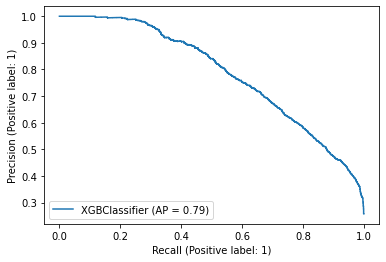

In [185]:
PrecisionRecallDisplay.from_estimator(model, valid_X, valid_y)

#### Classification_report

In [186]:
from sklearn.metrics import classification_report

In [187]:
cl_report = classification_report(valid_y, predicted_values)

In [188]:
print(cl_report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6675
           1       0.80      0.54      0.65      2117

    accuracy                           0.86      8792
   macro avg       0.84      0.75      0.78      8792
weighted avg       0.85      0.86      0.85      8792



## Generating the results

In [189]:
def predictions(df):
    df = drop_features(df)
    df = outlier(df)
    df = encode(df)
    df = impute(df)
    df = test_encoder(df)
    print(df)
    prediction_results = model.predict(df)
    submission = pd.DataFrame({"id": df.index, "outcome":prediction_results})
    return submission   

In [190]:
submissions = predictions(test_data)

     age  workclass  education  capital-gain  capital-loss  hours-per-week  \
0     39        6.0       11.0             0             0              40   
1     32        4.0        7.0             0             0              42   
2     47        4.0       11.0             0             0              40   
3     19        4.0        2.0             0             0              20   
4     46        6.0       11.0             0             0              40   
..   ...        ...        ...           ...           ...             ...   
894   27        4.0       12.0             0             0              55   
895   17        4.0        1.0             0             0              20   
896   24        4.0       15.0             0             0              40   
897   35        4.0       15.0             0             0              40   
898   37        1.0       12.0             0             0              45   

     race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Bla

C:\Users\yaswa\AppData\Local\Temp\ipykernel_660\696609173.py:11: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df[col].cat.add_categories("None", inplace=True)
C:\Users\yaswa\AppData\Local\Temp\ipykernel_660\696609173.py:11: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df[col].cat.add_categories("None", inplace=True)
C:\Users\yaswa\AppData\Local\Temp\ipykernel_660\696609173.py:11: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df[col].cat.add_categories("None", inplace=True)
C:\Users\yaswa\AppData\Local\Temp\ipykernel

In [191]:
print(submissions)

      id  outcome
0      0        0
1      1        0
2      2        0
3      3        0
4      4        0
..   ...      ...
894  894        0
895  895        0
896  896        0
897  897        0
898  898        0

[899 rows x 2 columns]


In [193]:
submissions.to_csv("Submissions_outcome.csv", index=False)